# Workshop 2 - Using Python for Standard Curves

## Questions:

1. How can I fit a stratigh line to data using Python?
2. How can I use Python to estimate the values for unknowns using the standard curve I have generated?

## Objectives:

1. Create a pandas dataframe using the standard curve data you generated in this week's lab session
2. Perform linear regression on that data
3. Plot the data in a "publication quality" graph
4. Use the equation from your linear regression to calculate the concentration of "unknown" samples

## What the ?!#! is pandas and why do we use it ??

An important part of science is dealing with data.  Data can have different levels of complexity, which you can think of as "dimensions", in the same way you might think og dimensions in space (except we can have more than three).  In terms of data, the dimensions describe how the data is arrayed:

**0-dimensional array**

A zero-dimensional array is a single number.  For example if we were to write the code:

```python
volume = 1
```
    
this would give a 0-dimension array with a single value.  On its own it doesn't tell us much, but as we've seen last week, it can be useful when combined with other data

**1-dimensional array**

A 1 dimensional array is a simple list of items, for example a list of numbers (0.1, 1, 0.4, 0.27, 2.1), or a list of items (H, He, Li, Be, B etc).  There is more information here, but on its own it is hard to know, for example, whether the order is important.

**2-dimensional array**
A 2-dimensional array is an array with rows and columns - think of a spreadsheet.  It can have any number of rows and columns, but all the data in a given column is in some way related, as is all the data in a given row.  This allows us to investigate the relationship *between* rows and columns.  Cartesian co-ordinates are great for visualising such relationships, and we often think of the data in one column as X-axis data, and data in another as Y-axis data

**3-dimensional array**
Cartesian co-ordinates are great for looking at the relationship between two sets of data - an independent variable and a dependent variable, say.  But what if we want to look at the effects of ***two*** independent variables on a dependent variable (for example the effects of temperature and pH on a reaction rate)?  Then we might want to add a third axis to our cartesian co-ordinates - we mnight call it the Z axis.  A 3 dimensional array can be thought of as a collection of 2-dimensional arrays stacked one on top of the other, for example multiple sets of data containing temperature in the X column and reaction rate in the Y column, with each array referring to a different pH.

**n-dimensional array**
When we are carrying out complex scientific experiments there may be numerous potential independent variables (height, weight, age, race, socioeconomic status, diet etc. etc.)  Visualising such data is ~impossible, but computers are still able to carry out maths with such data.  The number of dimensions to an array is theoretically limitless...

So far we have used the core capabilities of Python to look very simply at 0- and 1-dimensional data (values and lists).  Python is very flexible, and has a huge array of uses.  However, if all uses were built into the core capabilities of Python it would become too big to use.  Instead, we call upon libraries of tools to do specific jobs.  There are very good tools for working with 3+-dimensional arrays of data (numpy is probably the best known), but we will be working with a tool highly specialised for working with 2D-arrays - this is ***pandas***.

These workshops will scratch the surface of pandas' capabilities...as much as anything I want to get you used to dealing with data in Python.  You may want to explore further.  If so, here are some great places to start.

* Using pandas for data analysis from MoISSI
* An excellent online textbook Scientific Computing for Scientists, which you can find on GitHub
* An excellent set of YouTube tutorials




# Importing the Data

The data you generated in the lab session should be saved in a .csv file in the same folfer where you are running this Jupyterlabs iteration.  We will start to analyse that data by imprting the .csv file into python.We will first import the python libraries that we need to work with, and then import the data into a pandas dataframe

In [3]:
# import the libraries we need

import os # to help us work with files and directories/folders
import numpy as np
import pandas as pd # the as pd bit saves keystrokes
from scipy import stats # imports just a part of the scipy library
import matplotlib.pyplot as plt # This is a library we will use for drawing graphs
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score # AS you can probably work out, these are tools for working with our linear regression plot.

In [4]:
# create the filehandle for the .csv file that contains the data

datafile = os.path.join('data', 'protein_assay.csv')
print(datafile)

data\protein_assay.csv


In [5]:
# Creating the npandas dataframe using read_csv

protein_assay_df = pd.read_csv(datafile)

protein_assay_df.head()

,Concentration,Abs595,T_A595
0,0.001,-0.2640,0.0000
1,0.002,-0.2570,0.0070
2,0.010,-0.1899,0.0741
3,0.020,-0.1182,0.1458
4,0.100,0.1066,0.3706


When you look at this dataframe, note that the index (the far left column, in bold) is an integer.  We want the index to be the protein concentration.  This is easy to fix:

```python
df.set_index('column name', inplace=True)
```
For this file this isn't so important, but when we have multiple "Y-columns", then making the X-data our index makes it easy to ignore when we carry out operations on the Y-column (e.g. to transform absorbances to concentrations).  We use `inplace = true` option to make the change to the dataframe permanent

In [7]:
# protein_assay_df.set_index('Concentration', inplace=True)

# protein_assay_df

Let's have a look at the data that's now in our dataframe.  We'll start off with a straightforward plot that is built into pandas

<Axes: xlabel='Concentration'>

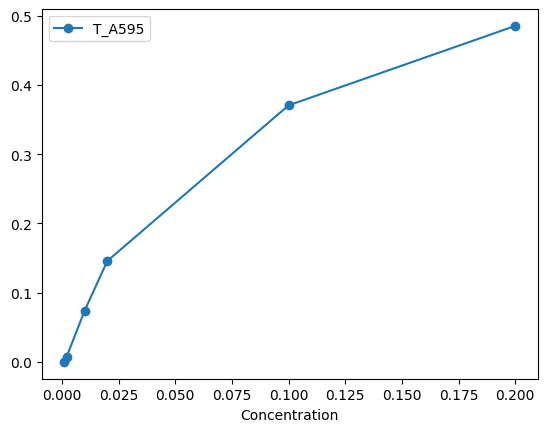

In [9]:
protein_assay_df.plot(kind = 'line', x = 'Concentration', y = 'T_A595', marker = 'o')

This is useful but oftern we will want to make a more customised graph, and the plotting functionality that comes with `matplotlib` gives us much more flexibility.  It would also be good to calculate a regression line, and include it on the graph.  So first, we'll do those calculations

In [11]:
# Extracting the data
X = protein_assay_df[['Concentration']].values  # Predictor variable
Y = protein_assay_df['T_A595'].values    # Response variable

# Performing linear regression
model = LinearRegression()
model.fit(X,Y)

# Predicting Y values using the fitted model
Y_pred = model.predict(X)

# Calculating the coefficient of determination (R^2)
r2 = r2_score(Y, Y_pred)

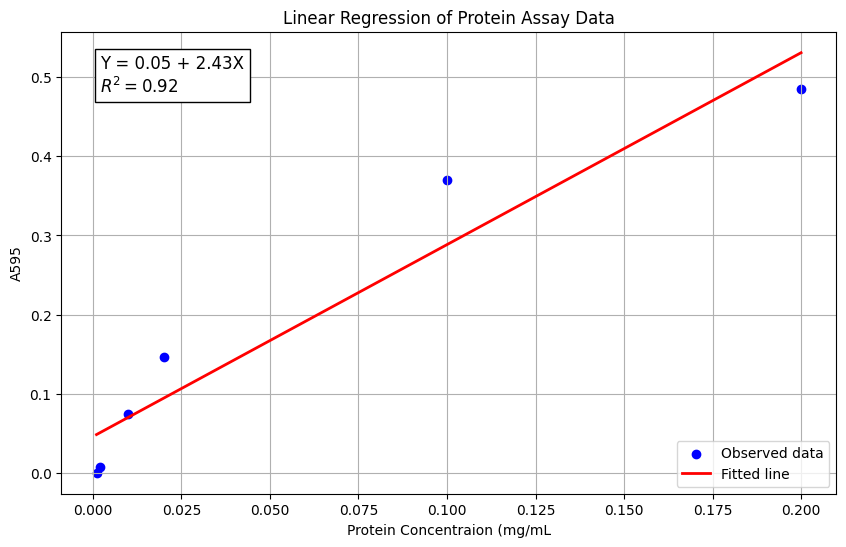

In [12]:
# Creating the plot
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Observed data')
plt.plot(X, Y_pred, color='red', linewidth=2, label='Fitted line')
plt.xlabel('Protein Concentraion (mg/mL')
plt.ylabel('A595')
plt.title('Linear Regression of Protein Assay Data')
plt.legend()
plt.grid(True)

# Annotating the plot with the regression equation and R^2 value
equation_text = f'Y = {model.intercept_:.2f} + {model.coef_[0]:.2f}X\n$R^2 = {r2:.2f}$'
plt.annotate(equation_text, xy=(0.05, 0.95), xycoords='axes fraction',
             fontsize=12, ha='left', va='top', bbox=dict(facecolor='white', edgecolor='black'))

# Display the plot
plt.show()

Often standard curves are only linear over a certain range of standard concentrations; and often we don't know this until we've completed the experiment.  Here we see the increase in absorption begin to plateau at high protein concentrations.  Perhaps it woud be better to fit a straight line only to concentrations below 0.1 mg/mL...pandas can help us with this

In [14]:
# Generate a new dataframe containing only the linear part of the standard curve.

Linear_pa_df = protein_assay_df[protein_assay_df['Concentration'] < 0.1]
print("\nDataFrame with 'Concentration' values less than 0.1:")
Linear_pa_df


DataFrame with 'Concentration' values less than 0.1:


,Concentration,Abs595,T_A595
0,0.001,-0.2640,0.0000
1,0.002,-0.2570,0.0070
2,0.010,-0.1899,0.0741
3,0.020,-0.1182,0.1458


In [15]:
# Extracting the data
P = Linear_pa_df[['Concentration']].values  # Predictor variable
Q = Linear_pa_df['T_A595'].values    # Response variable

# Performing linear regression
model = LinearRegression()
model.fit(P, Q)

# Predicting Y values using the fitted model
Q_pred = model.predict(P)

# Calculating the coefficient of determination (R^2)
r2 = r2_score(Q, Q_pred)

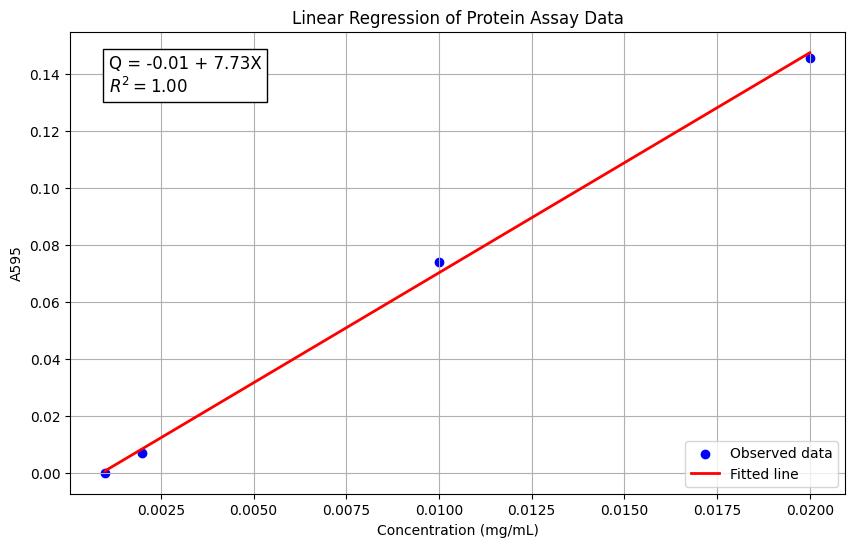

In [16]:
# Creating the plot
plt.figure(figsize=(10, 6))
plt.scatter(P, Q, color='blue', label='Observed data')
plt.plot(P, Q_pred, color='red', linewidth=2, label='Fitted line')
plt.xlabel('Concentration (mg/mL)')
plt.ylabel('A595')
plt.title('Linear Regression of Protein Assay Data')
plt.legend()
plt.grid(True)

# Annotating the plot with the regression equation and R^2 value
equation_text = f'Q = {model.intercept_:.2f} + {model.coef_[0]:.2f}X\n$R^2 = {r2:.2f}$'
plt.annotate(equation_text, xy=(0.05, 0.95), xycoords='axes fraction',
             fontsize=12, ha='left', va='top', bbox=dict(facecolor='white', edgecolor='black'))

# Display the plot
plt.show()

Now we have a decent looking standard curve, we want to use this to estimate the concentration of our *unknown samples*.  Pandas can do this for us too, by rearranging the equation of our line (above) so that rather than 

    Y=mX + c

we have 

    X=(Y-c)/m, or 

    X=(Y-intercept)/slope

First we need to calculate the slope and intercept, and define these as variables:
    

In [31]:
# Displaying the model parameters
intercept = model.intercept_
slope = model.coef_[0]

print(f"Intercept: {intercept}, Slope: {slope}")


Intercept: -0.00704457572502689, Slope: 7.729645542427502


In [85]:
# First input the measured absorbance for your first unknown sample
measured_y = [0.13, 0.15, 0.08, 0.20]

#Calculate estimated concentrations, and add them to a new list PredXs
PredXs = []
for val in measured_y:
    PredXs.append((val-intercept)/slope)

# Create a new empty dataframe called "Unknowns_df"
Unknowns_df = pd.DataFrame()

# Add columns to the dataframe, and assign data from our list variables
Unknowns_df["Measured Absorbance"] = measured_y
Unknowns_df["Estimated Concentrations"] = PredXs

Unknowns_df

,Measured Absorbance,Estimated Concentrations
0,0.13,0.017730
1,0.15,0.020317
2,0.08,0.011261
3,0.20,0.026786


Python has done a lot of heavy lifting for you here...now go back to your graph, and do a ***sanity check***...Look at the graph above; find the measured Y values on the Y-axis; measure across to hit the best fir line, and then down to find the predicted concentration.  Does that match what Python has told you?

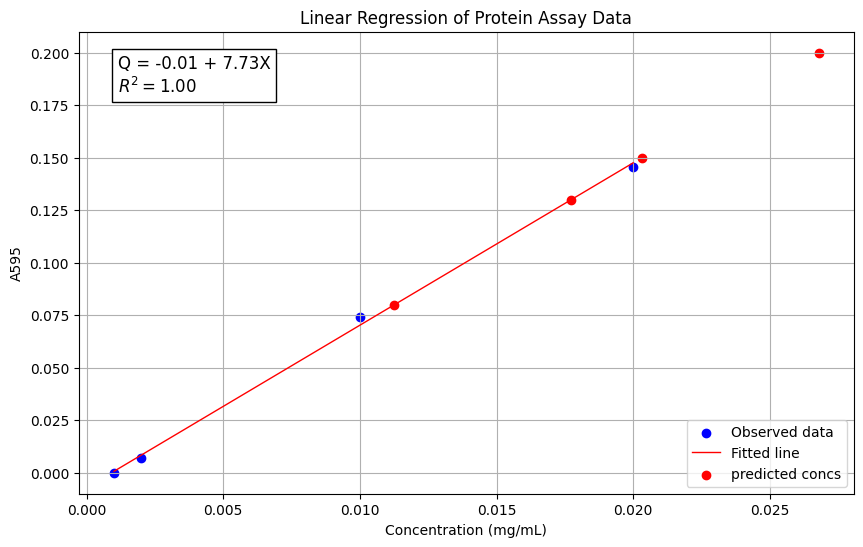

In [92]:
# Creating the plot
plt.figure(figsize=(10, 6))
plt.scatter(P, Q, color='blue', label='Observed data')
plt.plot(P, Q_pred, color='red', linewidth=1, label='Fitted line')

# Add in the new predicted concnetrations as red dots
plt.scatter(PredXs, measured_y, color='red', label='predicted concs')

plt.xlabel('Concentration (mg/mL)')
plt.ylabel('A595')
plt.title('Linear Regression of Protein Assay Data')
plt.legend()
plt.grid(True)

# Annotating the plot with the regression equation and R^2 value
equation_text = f'Q = {model.intercept_:.2f} + {model.coef_[0]:.2f}X\n$R^2 = {r2:.2f}$'
plt.annotate(equation_text, xy=(0.05, 0.95), xycoords='axes fraction',
             fontsize=12, ha='left', va='top', bbox=dict(facecolor='white', edgecolor='black'))

# Display the plot
plt.show()